In [1]:
#Imports
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Apartado 2. Regresión Lineal Regularizada - Curva de Aprendizaje

In [2]:
#Hipotesis
def hipotesis(X, Theta):
    return Theta[0] + Theta[1] * X

In [3]:
# Funcion de coste
def cost_funct(Theta, X, y, Lambda):
    m = X.shape[0]
    h = np.dot(X, Theta[:, None])
    J = np.sum((h - y)**2)
    J = J/(2*m)
    reg_term = np.sum(Theta[1:]**2)
    reg_term = (reg_term*Lambda)/(2*m)
    J = J + reg_term
    return J

In [4]:
def gradient_funct(Theta, X, y, Lambda):
    #X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    m = np.shape(X)[0]
    h = np.dot(X, Theta[:, None])
    #h = hipotesis(X, Theta)
    grad = np.matmul(X.T, h - y)
    grad = grad/m
    reg_term = (Lambda/m)*Theta
    grad = grad + reg_term
    grad = np.delete(grad, 0, 1)
    return grad

In [5]:
def gradiente(theta, XX, Y, landa):
    m = np.shape(XX)[0]
    h = np.dot(XX, theta[:, None])

    #Eliminamos la primera columna de theta
    thetaAux = np.delete(theta, 0, 0)
    return (1 / m) * np.matmul(XX.T, h - Y)+((landa/m) * thetaAux)

In [6]:
def draw_graph(Theta, X, y):
    plt.scatter(X, y, marker = 'x', c = 'red')
    y = hipotesis(X, Theta)
    plt.plot(X, y, c='blue')
    plt.legend()
    plt.show()

In [7]:
def learning_curve(X, y, Lambda, Theta, Xval, yval):
    
    m1 = X.shape[0]
    m2 = Xval.shape[0]
    err1 = np.zeros(m1)
    err2 = np.zeros(m2)
    
    for i in range(1, X.shape[0] + 1):
        ThetasOpt = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient_funct, args=(X[0:i], y[0:i], Lambda))
        ThetasOpt = ThetasOpt[0]
        print("Thetas1", ThetasOpt)
        print("i:", i)
        
        err1[i - 1] = error_calculation(ThetasOpt, X[0:i], y[0:i], m1)
        err2[i - 1] = error_calculation(ThetasOpt, Xval, yval, m2)
        print("Error1:", err1[i-1])
        print("Error2:", err2[i-1])
        
    #print("Error1:", err1)
    #print("Error2:", err2)
    return err1, err2

In [8]:
def error_calculation(Theta, X, y, m):
    h = np.dot(X, Theta[:, None])
    #h = hipotesis(X, Theta)
    J = np.sum((h - y)**2)
    J = J/(2*m)
    return J
    #h = np.dot(X, Theta[:, None])
    #return (1 / (2 * m)) * ((np.sum(np.square(h - y))))

In [10]:
def draw_learning_curve(err1, err2):
    a = np.arange(len(err1))
    b = err1
    plt.plot(a, b, c="blue", label="Train")

    d = err2[0:len(err1)]
    plt.plot(a, d, c="orange", label="Cross Validation")

In [14]:
def pinta_Curva_Aprendizaje(err1, err2):
    
    a = np.arange(len(err1))
    b = err1
    plt.plot(a, b, c="blue", label="Train")

    d = err2[0:len(err1)]
    plt.plot(a, d, c="orange", label="Cross Validation")

In [15]:
def main():
    #Cargamos los datos del fichero "ex5data1.mat'
    datafile = 'ex5data1.mat'
    mat = loadmat(datafile)
    X = mat.get("X")
    y = mat.get("y")
    
    Xval = mat.get("Xval")
    yval = mat.get("yval")
    
    print(X.shape, y.shape)
    print(Xval.shape, yval.shape)
    
    print(np.mean(X), np.std(X))
    print(np.mean(y), np.std(y))

    Lambda = 0
    X_ones = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    Xval_ones = np.hstack((np.ones(shape=(Xval.shape[0],1)),Xval))
    Theta = np.ones(X_ones.shape[1])
    
    cost = cost_funct(Theta, X_ones, y, Lambda)
    grad = gradient_funct(Theta, X_ones, y, Lambda)
    
    print("cost:", cost)
    print("grad:", grad)
    
    result = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient_funct, args=(X_ones, y, Lambda))
    ThetaOpt = result[0]
    
    err1, err2 = learning_curve(X_ones, y, Lambda, Theta, Xval_ones, yval)
    draw_learning_curve(err1, err2)
    
    plt.legend()
    plt.show()

    landa = 0

    XwithOnes=np.hstack((np.ones(shape=(X.shape[0],1)),X))

    XvalWithOnes = np.hstack((np.ones(shape=(Xval.shape[0],1)),Xval))

    theta = np.ones(XwithOnes.shape[1])

    err1, err2 = curva_aprendizaje(XwithOnes, y, landa, theta, XvalWithOnes, yval)

    pinta_Curva_Aprendizaje(err1, err2)

    plt.legend()
    plt.show()

(12, 1) (12, 1)
(21, 1) (21, 1)
-5.085426348834809 28.68873075847896
11.217589325366376 12.492955274415026
cost: 303.9515255535976
grad: [[-15.30301567]
 [598.16741084]]
Thetas1 [ 1.06695055 -0.06697472]
i: 1
Error1: 7.192945154570559e-19
Error2: 169.87070840820138
Thetas1 [3.29319568 0.07271775]
i: 2
Error1: 1.395174109137553e-18
Error2: 110.30036584504248
Thetas1 [14.15498975  0.53912266]
i: 3
Error1: 0.8216487613753211
Error2: 45.01023144430754
Thetas1 [14.62429824  0.55985727]
i: 4
Error1: 0.9475592297999326
Error2: 48.36891147269707
Thetas1 [17.21375995  0.44974975]
i: 5
Error1: 5.480853670464555
Error2: 35.865165210006616
Thetas1 [15.40485122  0.45741711]
i: 6
Error1: 9.721981256247737
Error2: 33.82996176310068
Thetas1 [14.26678043  0.4368173 ]
i: 7
Error1: 11.72413763213521
Error2: 31.97098569211143
Thetas1 [14.62344002  0.42312838]
i: 8
Error1: 12.115239130133352
Error2: 30.862446294949088
Thetas1 [13.29661002  0.41299409]
i: 9
Error1: 16.95705406871605
Error2: 31.1359981911453

  NIT   NF   F                       GTG
    0    1  3.039515255535976E+02   3.58038434E+05
tnc: fscale = 0.000835613
    1    3  9.299577620594808E+01   1.36988337E+02
tnc: fscale = 0.0427197
    2    5  4.008670401834714E+01   2.25224917E+04
    3    7  2.237390649510906E+01   6.62767544E-11
tnc: fscale = 61417.1
tnc: |fn-fn-1] = 3.41188e-14 -> convergence
    4    9  2.237390649510902E+01   2.10473664E-13
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.457106922645887E+02   7.43067003E+04
tnc: fscale = 0.00183424
    1    3  8.631534185484672E-18   4.40174166E-15
tnc: |pg| = 3.61706e-05 -> local minimum
    1    3  8.631534185484672E-18   4.40174166E-15
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.878623740891748E+02   3.18073041E+05
tnc: fscale = 0.000886557
    1    3  2.004821342908418E-01   3.16698305E-02
tnc: fscale = 2.80962
    2    5  1.406351957438132E-04   1.55393840E-01
    3    7  8.

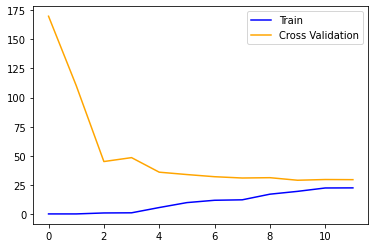

Thetas [ 1.06695055 -0.06697472]
i: 1
Error1: 7.192945154570559e-19
Error2: 169.87070840820135
Thetas [3.29319568 0.07271775]
i: 2
Error1: 1.3951741091375528e-18
Error2: 110.30036584504248
Thetas [14.15499028  0.53912266]
i: 3
Error1: 0.8216487613753347
Error2: 45.010231234641175
Thetas [14.62429824  0.55985727]
i: 4
Error1: 0.9475592297999326
Error2: 48.36891147269707
Thetas [17.21375957  0.44974975]
i: 5
Error1: 5.480853670464558
Error2: 35.86516420888284
Thetas [15.40485121  0.45741711]
i: 6
Error1: 9.721981256247737
Error2: 33.829961749819155
Thetas [14.26678031  0.4368173 ]
i: 7
Error1: 11.724137632135196
Error2: 31.970985730857027
Thetas [14.62344002  0.42312838]
i: 8
Error1: 12.11523913013335
Error2: 30.862446294949084
Thetas [13.29661008  0.41299409]
i: 9
Error1: 16.95705406871604
Error2: 31.135998056141936
Thetas [13.85366366  0.37780979]
i: 10
Error1: 19.38455132717669
Error2: 28.93620722435191
Thetas [12.93724128  0.36342987]
i: 11
Error1: 22.29081212237384
Error2: 29.551431

  NIT   NF   F                       GTG
    0    1  1.457106922645887E+02   7.43067003E+04
tnc: fscale = 0.00183424
    1    3  8.631534185484672E-18   4.40174166E-15
tnc: |pg| = 3.61706e-05 -> local minimum
    1    3  8.631534185484672E-18   4.40174166E-15
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.878623740891748E+02   3.18073041E+05
tnc: fscale = 0.000886557
    1    3  2.004821342908418E-01   3.16698305E-02
tnc: fscale = 2.80962
    2    5  1.406351957438132E-04   1.55393840E-01
    3    7  8.371044654825317E-18   7.81622440E-18
tnc: |pg| = 9.95065e-10 -> local minimum
    3    7  8.371044654825317E-18   7.81622440E-18
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.932434806358119E+02   1.68157035E+05
tnc: fscale = 0.00121931
    1    3  8.863206576484284E+01   1.68991143E+02
tnc: fscale = 0.0384625
    2    5  4.163125443155428E+01   3.39442176E+04
    3    7  3.286595045501388E+00   8.07

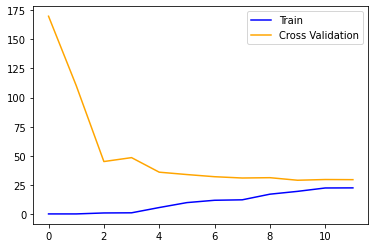

In [16]:
main()

In [17]:
Thetas [ 1.06695055 -0.06697472]
Error1: 7.192945154570559e-19
Error2: 169.87070840820135
Thetas [3.29319568 0.07271775]
Error1: 1.3951741091375528e-18
Error2: 110.30036584504248
Thetas [14.15499028  0.53912266]
Error1: 0.8216487613753347
Error2: 45.010231234641175
Thetas [14.62429824  0.55985727]
Error1: 0.9475592297999326
Error2: 48.36891147269707
Thetas [17.21375957  0.44974975]
Error1: 5.480853670464558
Error2: 35.86516420888284
Thetas [15.40485121  0.45741711]
Error1: 9.721981256247737
Error2: 33.829961749819155
Thetas [14.26678031  0.4368173 ]
Error1: 11.724137632135196
Error2: 31.970985730857027
Thetas [14.62344002  0.42312838]
Error1: 12.11523913013335
Error2: 30.862446294949084
Thetas [13.29661008  0.41299409]
Error1: 16.95705406871604
Error2: 31.135998056141936
Thetas [13.85366366  0.37780979]
Error1: 19.38455132717669
Error2: 28.93620722435191
Thetas [12.93724128  0.36342987]
Error1: 22.29081212237384
Error2: 29.551431975377273
Thetas [13.08790378  0.36777923]
Error1: 22.373906495108947
Error2: 29.433817800893944

SyntaxError: invalid syntax (1179229446.py, line 4)

In [ ]:
Thetas [ 1.06695055 -0.06697472]
Thetas [3.29319568 0.07271775]
Thetas [14.15499028  0.53912266]
Thetas [14.62429824  0.55985727]
Thetas [17.21375957  0.44974975]
Thetas [15.40485121  0.45741711]
Thetas [14.26678031  0.4368173 ]
Thetas [14.62344002  0.42312838]
Thetas [13.29661008  0.41299409]
Thetas [13.85366366  0.37780979]
Thetas [12.93724128  0.36342987]
Thetas [13.08790378  0.36777923]